In [1]:
import numpy as np
import math
from sklearn.decomposition import PCA
from PIL import Image
import os
import random

seed = 1227
random.seed = seed
np.random.seed = seed

In [2]:
tr_path = "Data/Data_train/"
tt_path = "Data/Data_test/"
tr_data = [[], [], []]
tt_data = [[], [], []]

for name in os.listdir(tr_path + "Carambula"):
    image = Image.open(tr_path + "Carambula/" + name)
    tr_data[0].append(np.array(image).reshape(32*32*2))
for name in os.listdir(tr_path + "Lychee"):
    image = Image.open(tr_path + "Lychee/" + name)
    tr_data[1].append(np.array(image).reshape(32*32*2))
for name in os.listdir(tr_path + "Pear"):
    image = Image.open(tr_path + "Pear/" + name)
    tr_data[2].append(np.array(image).reshape(32*32*2))
    
for name in os.listdir(tt_path + "Carambula"):
    image = Image.open(tt_path + "Carambula/" + name)
    tt_data[0].append(np.array(image).reshape(32*32*2))
for name in os.listdir(tt_path + "Lychee"):
    image = Image.open(tt_path + "Lychee/" + name)
    tt_data[1].append(np.array(image).reshape(32*32*2))
for name in os.listdir(tt_path + "Pear"):
    image = Image.open(tt_path + "Pear/" + name)
    tt_data[2].append(np.array(image).reshape(32*32*2))
    
for i in range(3):
    tr_data[i] = np.array(tr_data[i])
    tt_data[i] = np.array(tt_data[i])

for i in range(3):
    pca = PCA(n_components=2)
    pca.fit(tr_data[i])
    tr_data[i] = pca.transform(tr_data[i])
    tt_data[i] = pca.transform(tt_data[i])
    

tr_in = []
tt_in = []

for i in range(3):
    for q in range(len(tr_data[i])):
        label = np.zeros((3))
        label[i] = 1
        tr_in.append([label, np.append(tr_data[i][q], np.array([1]))])
    for q in range(len(tt_data[i])):
        label = np.zeros((3))
        label[i] = 1
        tt_in.append([label, np.append(tt_data[i][q], np.array([1]))])
        
random.shuffle(tr_in)

In [3]:

te = np.array(tr_in)
for i in range(2):
    me = np.mean(te[:,1,i])
    std = np.std(te[:,1,i])
    for q in range(len(tr_in)):
        tr_in[q][1][i] -= me
        tr_in[q][1][i] /= std
    for q in range(len(tt_in)):
        tt_in[q][1][i] -= me
        tt_in[q][1][i] /= std


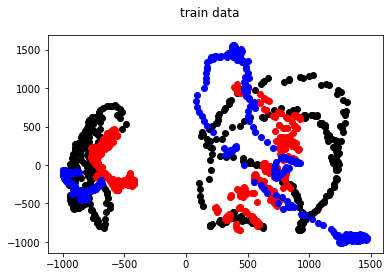

In [4]:
# import matplotlib.pyplot as plt 
# plt.suptitle("train data")
# for i in tr_data[0]:
#     plt.plot(i[0], i[1], 'o', color='black');
# for i in tr_data[1]:
#     plt.plot(i[0], i[1], 'o', color='red');
# for i in tr_data[2]:
#     plt.plot(i[0], i[1], 'o', color='blue');


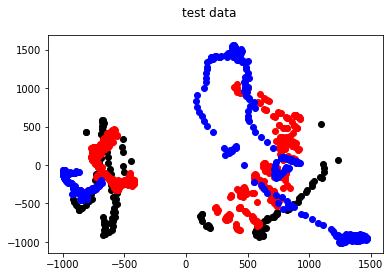

In [5]:
# import matplotlib.pyplot as plt 
# plt.suptitle("test data")
# for i in tt_data[0]:
#     plt.plot(i[0], i[1], 'o', color='black');
# for i in tr_data[1]:
#     plt.plot(i[0], i[1], 'o', color='red');
# for i in tr_data[2]:
#     plt.plot(i[0], i[1], 'o', color='blue');


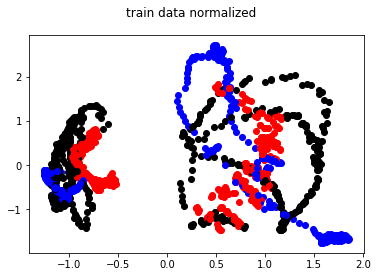

In [6]:
# plt.suptitle("train data normalized")
# for i in tr_in:
#     if list(i[0]).index(1) == 0:
#         plt.plot(i[1][0], i[1][1], 'o', color='black');
#     elif list(i[0]).index(1) == 1:
#         plt.plot(i[1][0], i[1][1], 'o', color='red');
#     elif list(i[0]).index(1) == 2:
#         plt.plot(i[1][0], i[1][1], 'o', color='blue');

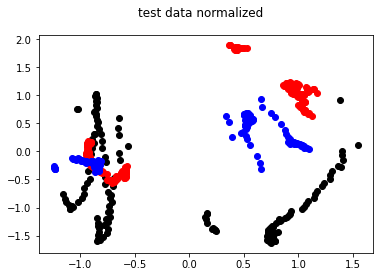

In [7]:
# plt.suptitle("test data normalized")
# for i in tt_in:
#     if list(i[0]).index(1) == 0:
#         plt.plot(i[1][0], i[1][1], 'o', color='black');
#     elif list(i[0]).index(1) == 1:
#         plt.plot(i[1][0], i[1][1], 'o', color='red');
#     elif list(i[0]).index(1) == 2:
#         plt.plot(i[1][0], i[1][1], 'o', color='blue');

In [8]:
def softmax(x):
    exp = np.exp(x-x.max())
    return exp/exp.sum()
#     return np.exp(x) / np.sum(np.exp(x), axis=0)
def liner(x):
    return x;
def init(k, m):
#     return np.random.random((k, m))
    return np.random.uniform(-math.sqrt(6/k+m), math.sqrt(6/k+m), (k, m))
def cross(pred, y):
    loss = 0
    for i in range(len(pred)):
            loss -= y[i] * math.log2(pred[i])
    return loss
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [9]:
class three_layer:
    def __init__(self, inpdim, lr):
        self.lr = lr
        self.inpdim = inpdim
        self.hid2 = 32
        self.hid3 = 32
        self.dim = [inpdim, self.hid2, self.hid3, 3]
        self.act = [sigmoid, sigmoid, softmax]
        self.w = np.array([init(inpdim, self.hid2), init(self.hid2, self.hid3), init(self.hid3, 3)])
    def forward(self, data):
        z1 = data.dot(self.w[0])
        self.a1 = sigmoid(z1)
        z2 = self.a1.dot(self.w[1])
        self.a2 = sigmoid(z2)
        z3 = self.a2.dot(self.w[2])
        out = softmax(z3)
        return out
    def backward(self, data, pred, y):
        dw = np.array([np.zeros((self.inpdim, self.hid2)), np.zeros((self.hid2, self.hid3)), np.zeros((self.hid3, 3))])
        for i in range(3):
            dl = pred[i] - y[i]
            for q in range(self.hid3):
                dw[2][q][i] += dl * self.a2[q]
            for q in range(self.hid3):
                for k in range(self.hid2):
                    dw[1][k][q] += dl * self.w[2][q][i] * self.a2[q] * (1 - self.a2[q]) * self.a1[k]
            for q in range(self.inpdim):
                for k in range(self.hid2):
                    tmp = 0.0
                    for j in range(self.hid3):
                        tmp += self.w[2][j][i] * self.a2[j] * (1 - self.a2[j]) * self.w[1][k][j]
                    dw[0][q][k] += dl * tmp * self.a1[k] * (1 - self.a1[k]) * data[q]
        return dw
    def train(self, in_data, mode="train"):
        if mode == "train":
            loss = 0
            dw = np.array([np.zeros((self.inpdim, self.hid2)), np.zeros((self.hid2, self.hid3)), np.zeros((self.hid3, 3))])
            for i in in_data:
                pred = self.forward(i[1])
                loss += cross(pred, i[0])
                dw += self.backward(i[1], pred, i[0])
            self.w -= self.lr * dw
            return loss
        else:
            re = []
            for i in in_data:
                re.append(self.forward(i[1]))
            return re;

In [10]:
epoch = 20
batch_size = 1
lr = 0.01

model = three_layer(tr_in[0][1].shape[0], lr)
loss_record = []
acc_record = []

for _ in range(epoch):
    loss = 0
    acc = 0
    for bti in range(math.ceil(len(tr_in)/batch_size)):
        now_in = tr_in[bti * batch_size : min((bti + 1) * batch_size, len(tr_in))]
        tmploss = model.train(now_in)
        loss += tmploss
        pred = model.train(now_in, mode="test")
        acc += (np.argmax(pred, 1) == np.argmax(np.array([i[0] for i in now_in]), 1)).sum()
    loss_record.append(loss)
    acc_record.append(acc/len(tr_in))
    print("epoch:", _, "loss:", loss, "Acc:", acc/len(tr_in))
    acc = 0
    pred = model.train(tt_in, mode="test")
    acc += (np.argmax(pred, 1) == np.argmax(np.array([i[0] for i in tt_in]), 1)).sum()
    print("Test data acc:", acc / len(tt_in))

<ipython-input-9-39faba2b0853>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.w = np.array([init(inpdim, self.hid2), init(self.hid2, self.hid3), init(self.hid3, 3)])
<ipython-input-9-39faba2b0853>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dw = np.array([np.zeros((self.inpdim, self.hid2)), np.zeros((self.hid2, self.hid3)), np.zeros((self.hid3, 3))])
<ipython-input-9-39faba2b0853>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths o

epoch: 0 loss: 2189.5432215276815 Acc: 0.6482993197278911
Test data acc: 0.4759036144578313
epoch: 1 loss: 1646.7085458536196 Acc: 0.7353741496598639
Test data acc: 0.46987951807228917
epoch: 2 loss: 1538.5092970788075 Acc: 0.7496598639455783
Test data acc: 0.4578313253012048
epoch: 3 loss: 1465.9383366803547 Acc: 0.7646258503401361
Test data acc: 0.4718875502008032
epoch: 4 loss: 1410.4272418208532 Acc: 0.7700680272108843
Test data acc: 0.46987951807228917
epoch: 5 loss: 1365.6239670879147 Acc: 0.780952380952381
Test data acc: 0.4718875502008032
epoch: 6 loss: 1327.9788729356017 Acc: 0.7925170068027211
Test data acc: 0.4819277108433735
epoch: 7 loss: 1295.4232119894461 Acc: 0.8040816326530612
Test data acc: 0.4959839357429719
epoch: 8 loss: 1266.6155139599794 Acc: 0.810204081632653
Test data acc: 0.5100401606425703
epoch: 9 loss: 1240.619836272545 Acc: 0.8115646258503402
Test data acc: 0.5522088353413654
epoch: 10 loss: 1216.7699120944455 Acc: 0.8156462585034013
Test data acc: 0.58835

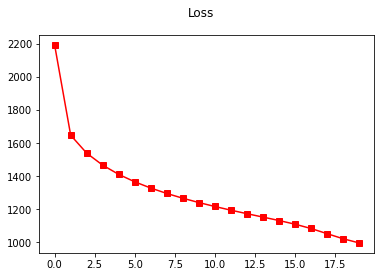

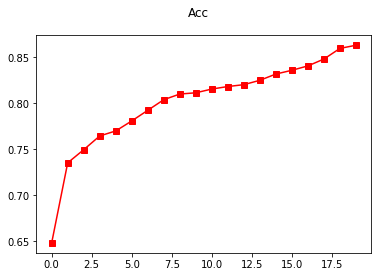

In [11]:
# import matplotlib.pyplot as plt 
# plt.suptitle("Loss")
# plt.plot(range(len(loss_record)),loss_record,'s-',color = 'r')
# plt.subplots()
# plt.suptitle("Acc")
# plt.plot(range(len(acc_record)),acc_record,'s-',color = 'r')

In [60]:
class two_layer:
    def __init__(self, inpdim, lr):
        self.lr = lr
        self.inpdim = inpdim
        self.hid2 = 16
        self.act = [liner, softmax]
        self.w = np.array([init(inpdim, self.hid2), init(self.hid2, 3)])
    def forward(self, data):
        z1 = data.dot(self.w[0])
        self.a1 = sigmoid(z1)
        z2 = self.a1.dot(self.w[1])
        out = softmax(z2)
        return out
    def backward(self, data, pred, y):
        dw = np.array([np.zeros((self.inpdim, self.hid2)), np.zeros((self.hid2, 3))])
        for i in range(3):
            dl = pred[i] - y[i]
            for q in range(self.hid2):
                dw[1][q][i] += dl * self.a1[q]
            for q in range(self.hid2):
                for k in range(self.inpdim):
                    dw[0][k][q] += dl * self.w[1][q][i] * self.a1[q] * (1 - self.a1[q]) * data[k]
        return dw
    def train(self, in_data, mode="train"):
        if mode == "train":
            loss = 0
            dw = np.array([np.zeros((self.inpdim, self.hid2)), np.zeros((self.hid2, 3))])
            for i in in_data:
                pred = self.forward(i[1])
                loss += cross(pred, i[0])
                dw += self.backward(i[1], pred, i[0])
            self.w -= self.lr * dw
            return loss
        else:
            re = []
            for i in in_data:
                re.append(self.forward(i[1]))
            return re;

In [23]:
epoch = 20
batch_size = 1
lr = 0.1

model = two_layer(tr_in[0][1].shape[0], lr)
loss_record = []
acc_record = []

for _ in range(epoch):
    loss = 0
    acc = 0
    for bti in range(math.ceil(len(tr_in)/batch_size)):
        now_in = tr_in[bti * batch_size : min((bti + 1) * batch_size, len(tr_in))]
        tmploss = model.train(now_in)
        loss += tmploss
#         print("Loss:", tmploss)
        pred = model.train(now_in, mode="test")
        acc += (np.argmax(pred, 1) == np.argmax(np.array([i[0] for i in now_in]), 1)).sum()
    print("epoch:", _, "loss:", loss, "Acc:", acc/len(tr_in))
    loss_record.append(loss)
    acc_record.append(acc/len(tr_in))
    acc = 0
    pred = model.train(tt_in, mode="test")
    acc += (np.argmax(pred, 1) == np.argmax(np.array([i[0] for i in tt_in]), 1)).sum()
    print("Test data acc:", acc / len(tt_in))

<ipython-input-12-b5d6766ec330>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.w = np.array([init(inpdim, self.hid2), init(self.hid2, 3)])
<ipython-input-12-b5d6766ec330>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dw = np.array([np.zeros((self.inpdim, self.hid2)), np.zeros((self.hid2, 3))])
<ipython-input-12-b5d6766ec330>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

epoch: 0 loss: 2347.7127916447625 Acc: 0.9469387755102041
Test data acc: 0.2389558232931727
epoch: 1 loss: 1764.3895279987535 Acc: 0.9659863945578231
Test data acc: 0.4457831325301205
epoch: 2 loss: 1572.2445838516949 Acc: 0.9755102040816327
Test data acc: 0.4759036144578313
epoch: 3 loss: 1453.0143844934385 Acc: 0.9809523809523809
Test data acc: 0.5060240963855421
epoch: 4 loss: 1369.6831757922585 Acc: 0.9829931972789115
Test data acc: 0.5522088353413654
epoch: 5 loss: 1313.9842007421637 Acc: 0.9829931972789115
Test data acc: 0.5642570281124498
epoch: 6 loss: 1276.5798715801534 Acc: 0.9816326530612245
Test data acc: 0.5783132530120482
epoch: 7 loss: 1249.8674599321412 Acc: 0.9809523809523809
Test data acc: 0.5823293172690763
epoch: 8 loss: 1229.3287465084668 Acc: 0.9829931972789115
Test data acc: 0.5823293172690763
epoch: 9 loss: 1212.3445448646344 Acc: 0.9829931972789115
Test data acc: 0.5823293172690763
epoch: 10 loss: 1197.4588821635164 Acc: 0.9836734693877551
Test data acc: 0.5843

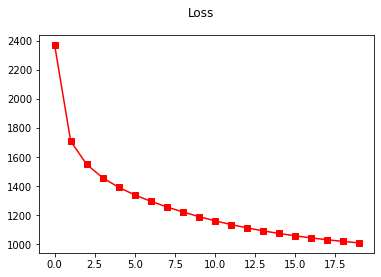

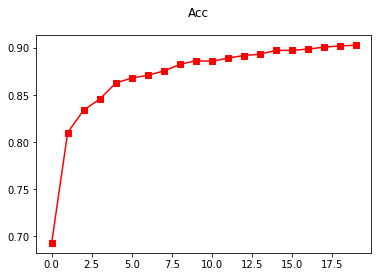

In [18]:
# import matplotlib.pyplot as plt 
# plt.suptitle("Loss")
# plt.plot(range(len(loss_record)),loss_record,'s-',color = 'r')
# plt.subplots()
# plt.suptitle("Acc")
# plt.plot(range(len(acc_record)),acc_record,'s-',color = 'r')

In [61]:
tmpmodel = two_layer(tr_in[0][1].shape[0], lr)

<ipython-input-60-acb8a8c00c57>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.w = np.array([init(inpdim, self.hid2), init(self.hid2, 3)])


In [85]:
acc_record = {1:[],10:[],50:[],100:[]}

In [92]:
acc_record[500] = []

In [93]:
epoch = 20
batch_size = 500
lr = 0.1

model = tmpmodel

for _ in range(epoch):
    loss = 0
    acc = 0
    for bti in range(math.ceil(len(tr_in)/batch_size)):
        now_in = tr_in[bti * batch_size : min((bti + 1) * batch_size, len(tr_in))]
        tmploss = model.train(now_in)
        loss += tmploss
#         print("Loss:", tmploss)
        pred = model.train(now_in, mode="test")
        acc += (np.argmax(pred, 1) == np.argmax(np.array([i[0] for i in now_in]), 1)).sum()
    print("epoch:", _, "loss:", loss, "Acc:", acc/len(tr_in))
    acc_record[batch_size].append(acc/len(tr_in))
acc = 0
pred = model.train(tt_in, mode="test")
acc += (np.argmax(pred, 1) == np.argmax(np.array([i[0] for i in tt_in]), 1)).sum()
print("Test data acc:", acc / len(tt_in))

<ipython-input-60-acb8a8c00c57>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dw = np.array([np.zeros((self.inpdim, self.hid2)), np.zeros((self.hid2, 3))])
<ipython-input-60-acb8a8c00c57>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dw = np.array([np.zeros((self.inpdim, self.hid2)), np.zeros((self.hid2, 3))])


epoch: 0 loss: 27228.041539140977 Acc: 0.4231292517006803
epoch: 1 loss: 60169.809680571 Acc: 0.3476190476190476
epoch: 2 loss: 63959.46525161951 Acc: 0.3380952380952381
epoch: 3 loss: 63837.17819853546 Acc: 0.35578231292517004
epoch: 4 loss: 64556.07240762259 Acc: 0.33877551020408164
epoch: 5 loss: 56623.08131490767 Acc: 0.3816326530612245
epoch: 6 loss: 51271.39272068362 Acc: 0.3904761904761905
epoch: 7 loss: 37509.43751343987 Acc: 0.47210884353741495
epoch: 8 loss: 34735.39127674392 Acc: 0.3380952380952381
epoch: 9 loss: 59478.63934126335 Acc: 0.3380952380952381
epoch: 10 loss: 51607.01399768926 Acc: 0.37755102040816324
epoch: 11 loss: 41789.31742180853 Acc: 0.38639455782312926
epoch: 12 loss: 56434.646502385396 Acc: 0.36122448979591837
epoch: 13 loss: 56851.007052644665 Acc: 0.3435374149659864
epoch: 14 loss: 40870.02169412313 Acc: 0.3598639455782313
epoch: 15 loss: 46242.803716377784 Acc: 0.37210884353741497
epoch: 16 loss: 42223.16211495293 Acc: 0.3904761904761905
epoch: 17 loss:

In [98]:
acc_record[100] = acc_record[100][:20]

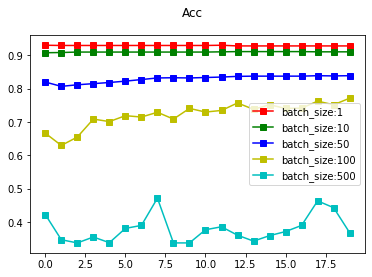

In [99]:
import matplotlib.pyplot as plt 
plt.suptitle("Acc")
plt.plot(range(len(acc_record[1])),acc_record[1],'s-',color = 'r', label="batch_size:1")
plt.plot(range(len(acc_record[10])),acc_record[10],'s-',color = 'g', label="batch_size:10")
plt.plot(range(len(acc_record[50])),acc_record[50],'s-',color = 'b', label="batch_size:50")
plt.plot(range(len(acc_record[100])),acc_record[100],'s-',color = 'y', label="batch_size:100")
plt.plot(range(len(acc_record[500])),acc_record[500],'s-',color = 'c', label="batch_size:500")

plt.legend()